# 보팅 앙상블
* 단일 모델을 앙상블하여 더 나은 예측을 하는 앙상블 모델을 만들어봄

In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier #의사결정나무
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

np.random.seed(5)

# 손글씨 데이터 로드

In [2]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

In [3]:
mnist= train_test_split(features, labels, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# 단일 모델 정확도 측정
* 의사결정트리, knn, svm 정확도를 측정

In [4]:
#의사결정트리
dtree = DecisionTreeClassifier(criterion='gini', max_depth=8, max_features=32, random_state=35).fit(X_train,y_train)

dtree_prdicated = dtree.predict(X_test)

In [5]:
#knn
knn = KNeighborsClassifier(n_neighbors=299).fit(X_train,y_train)
knn_prdicated = knn.predict(X_test)

In [6]:
#svm
svm = SVC(C=0.1, gamma=0.003, probability=True, random_state=35).fit(X_train,y_train)
svm_prdicated = svm.predict(X_test)

In [7]:
print('[accuracy]')
print('d-tree : ',accuracy_score(y_test, dtree_prdicated))
print('knn : ',accuracy_score(y_test, knn_prdicated))
print('svm : ',accuracy_score(y_test, svm_prdicated))

[accuracy]
d-tree :  0.8444444444444444
knn :  0.8333333333333334
svm :  0.9222222222222223


- 하드보팅 또는 소프트보팅은 sklearn의 votingclassifier를 사용하여 쉽게 구현할 수 있다. 
- 직접 소프트 보팅을 구현할 때는 predict_proba 함수를 사용하여 테스트 수행 시 측정된 분류값 별 확률을 사용하면 된다

In [8]:
svm_proba = svm.predict_proba(X_test)
print(svm_proba[0:2])

[[3.06901089e-04 1.91328486e-03 9.81970246e-01 1.05372445e-03
  8.67173882e-04 1.48711483e-03 3.38345621e-04 1.20585057e-03
  9.60806866e-03 1.24928986e-03]
 [6.68665761e-03 4.77517889e-02 2.97174052e-02 5.61418273e-01
  1.96137811e-02 4.71903953e-02 8.06174411e-03 4.33041343e-02
  1.76076547e-01 6.01792732e-02]]


## 하드보팅
* 하드보팅은 일반적인 투표와 같이 각각의 분류기의 예측값을 모아 가장 많은 득표를 받은 예측값으로 최종 결론을 내는 방식

In [9]:
voting_clf = VotingClassifier(estimators=[('decision',dtree),('knn',knn),('svm',svm)], weights=[1,1,1], voting='hard').fit(X_train,y_train)

hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test,hard_voting_predicted)

0.9111111111111111

## 소프트
* 소프트보팅은 각각의 분류 모델의 predict_proba을 활용하여 모든 분류값들의 확률들을 더해서 가장 높은 점수를 획득한 분류값으로 최종 결론을 내는 방식

In [10]:
voting_clf = VotingClassifier(estimators=[('decision',dtree),('knn',knn),('svm',svm)], weights=[1,1,1], voting='soft').fit(X_train,y_train)

soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test,soft_voting_predicted)

0.9

### 정확도 비교 시각화

([<matplotlib.axis.XTick at 0x1e598172550>,
 [Text(0, 0, 'decision tree'),
  Text(1, 0, 'knn'),
  Text(2, 0, 'svm'),
  Text(3, 0, 'hard voting'),
  Text(4, 0, 'soft voting')])

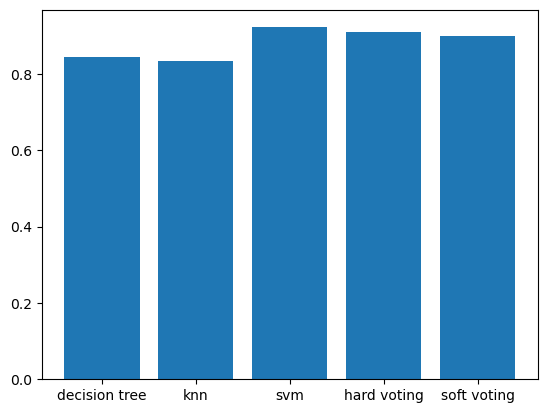

In [13]:
x = np.arange(5)
plt.bar(x,height=[accuracy_score(y_test, dtree_prdicated), 
                      accuracy_score(y_test, knn_prdicated),
                      accuracy_score(y_test, svm_prdicated),
                      accuracy_score(y_test, hard_voting_predicted),
                      accuracy_score(y_test, soft_voting_predicted)
                 ])
plt.xticks(x,['decision tree','knn','svm','hard voting','soft voting'])